Fonte: https://iascblog.wordpress.com/2017/05/08/aprendizado-nao-supervisionado-com-k-means-usando-python/



Repositório: https://github.com/felipemartinsss/RepositorioIAsc/blob/master/Python/Aprendizado-Nao-Supervisionado/Exemplos/kmeans_giga_hospital_sp.py

#Este exemplo foi criado por Felipe Martins (https://github.com/felipemartinsss) e foi adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

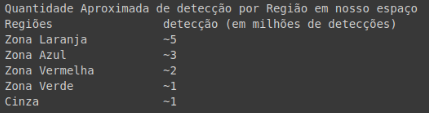

Faz-se necessário inciar a construção de um radar que atenda o maior número possível de detecções. Supondo que ocorrem aproximadamente 12 milhões de detecções em um determinado tempo.Em qual região deve inicar a construção do radar?  Para cada 1 milhão de detecções, há 1 unidade representada por um ponto no gráfico.

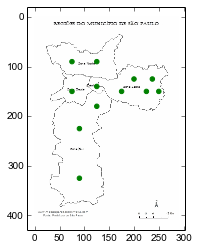

Inicialmente, por questões orçamentárias, 1 (k = 1) radar será manufaturado. Para k=1, confirme figura abaixo, k-means que o radar (cruz vermelha) deve ficar na transição entre a Zona Azul e a Zona Laranja, mas bem próximo ao cinza. O algoritmo está considerando a menor distância da maior parte das detecções.

KMeans - Scikit-Learn
Labels
[0 0 0 0 0 0 0 0 0 0 0 0]
Cluster centers:
[[149.33333333 158.33333333]]


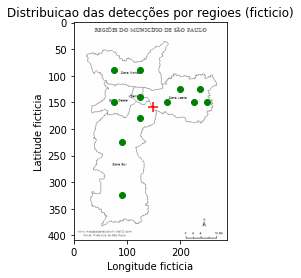

Defesa Oscar deve ir proteger o radar: [0]
Cor: vermelho


In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun May  7 15:13:39 2017
@author: felipemartinsss
"""

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Carrega imagem da reigão
import matplotlib.image as mpimg
image = mpimg.imread("./imagens/mapa-municipio-sao-paulo-regioes.png")
plt.imshow(image)

# Pontos indicando cada 1 milhão de detecções
population = [[90,225],[90,325],[75,90],[125,140],
              [125, 90],[75, 150],[175,150],[125,180],
              [200,125],[225,150],[237, 125],[250,150],]

# Matplotlib - Cores a serem utilizadas nos gráficos
colors = [
          "#FF0000", 
          "#00FF00",
          "#0000FF",
          "#FF00FF",
          "#FFFF00",
          "#00FFFF",
          "#800000",
          "#008000",
          "#000080",
          "#800080",
          "#808000",
          "#800080",
          ]
          
color_names = {"#FF0000": "vermelho", "#00FF00": "verde", "#0000FF": "azul"}


plt.title("Distribuicao das detecções por regioes (ficticio)")
plt.xlabel("Longitude ficticia")
plt.ylabel("Latitude ficticia")


for i in range(0, len(population)):
    plt.scatter(population[i][0], population[i][1], color="green")
    
X = np.array(population)

# Executa k-means sobre os pontos onde as detecções estão concentradas,
# simulacao com k = 1.
kmeans = KMeans(n_clusters = 1, random_state = 0).fit(X)
print("KMeans - Scikit-Learn")
print("Labels")
print(kmeans.labels_)
print("Cluster centers:")
print(kmeans.cluster_centers_)

for i in range(0, len(kmeans.cluster_centers_)):
    color_idx = i
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], color=colors[color_idx], marker="+", s=100)
plt.show()

# Tenta prever a qual cluster (grupo de defesa) pertence determinada detecção dada sua localização.
oscar = [[40, 120]]
cluster_id = kmeans.predict(oscar)
print("Defesa Oscar deve ir proteger o radar: %s" % cluster_id)
print("Cor: %s" % color_names[colors[int(cluster_id)]])